# Goals: Understand which customers to focus on 

- **Prediction Task**
- **How much they will sped in future.**
- **What probability will they make another purchase in te future.**

# From this project you can answer 3 questions to a Buisness

 **1. Which customers have the highest spend probability in next 90-days**

**2. Which Customers have recently purchased but are unlikely to buy**

**3. Which customers were predicted to purchase but didn't (missed oppurunities)**

# Procedure followed

## Step 1: Subset a cohort

**A cohort is a group of customers that all start at the same time**

## Step2: Temporal Splitting 

### Use future information to develop targets:

- **Amount Spent in Next 90 days**
- **Spend Flag(True/False)**

## Step 3: RFM Features

### Using Feature Engineering Creating

- **Recency Feature**
- **Freequency Feature**
- **Monetary Feature**

## Step 4: 2 Predictive Models

- **Model1: Predict how much a customer spend in next N-days(90)**
- **Model2: What probability a customer will purchase in next N-days(90days)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\bharathreddybollu\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### 1. Data Preparation

In [2]:
cd_data = pd.read_csv(r"C:\Users\bharathreddybollu\Desktop\CD\CDNOW_master.txt",sep = "\s+",names=["customer_id","date","quantity","price"])

In [3]:
cd_data.head(5)

,customer_id,date,quantity,price
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
cd_data.shape

(69659, 4)

In [5]:
cd_data.columns

Index(['customer_id', 'date', 'quantity', 'price'], dtype='object')

In [6]:
cd_data.dtypes

customer_id      int64
date             int64
quantity         int64
price          float64
dtype: object

In [7]:
cd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  69659 non-null  int64  
 1   date         69659 non-null  int64  
 2   quantity     69659 non-null  int64  
 3   price        69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [8]:
cd_data.describe()

,customer_id,date,quantity,price
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [9]:
cd_data["date"] = cd_data["date"].astype(str)

In [10]:
cd_data["date"] = pd.to_datetime(cd_data["date"])
# data['date'] = pd.to_datetime(data['int_date'].astype(str), format='%Y%m%d')

In [11]:
cd_data

,customer_id,date,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
...,...,...,...,...
69654,23568,1997-04-05,4,83.74
69655,23568,1997-04-22,1,14.99
69656,23569,1997-03-25,2,25.74
69657,23570,1997-03-25,3,51.12


In [12]:
cd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  69659 non-null  int64         
 1   date         69659 non-null  datetime64[ns]
 2   quantity     69659 non-null  int64         
 3   price        69659 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


### 2. Cohort Analysis

- Only the customers that have joined at the specific business day

- Get the range of Initial Purchases

In [15]:
cd_data_initial_purchase = cd_data.sort_values(["customer_id","date"]).groupby('customer_id').first()
cd_data_initial_purchase

,date,quantity,price
customer_id,,,
1,1997-01-01,1,11.77
2,1997-01-12,1,12.00
3,1997-01-02,2,20.76
4,1997-01-01,2,29.33
5,1997-01-01,2,29.33
...,...,...,...
23566,1997-03-25,2,36.00
23567,1997-03-25,1,20.97
23568,1997-03-25,1,22.97


In [16]:
first_purchase_date = cd_data_initial_purchase['date'].min()
print(first_purchase_date)
last_purchase_date = cd_data_initial_purchase['date'].max()
print(last_purchase_date)

1997-01-01 00:00:00
1997-03-25 00:00:00


#### Visualize All purchases within Cohort 

In [17]:
cd_data.reset_index().set_index('date')['price'].resample(rule="MS").sum()

date
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
1997-06-01    108395.87
1997-07-01    122078.88
1997-08-01     88367.69
1997-09-01     81948.80
1997-10-01     89780.77
1997-11-01    115448.64
1997-12-01     95577.35
1998-01-01     76756.78
1998-02-01     77096.96
1998-03-01    108970.15
1998-04-01     66231.52
1998-05-01     70989.66
1998-06-01     76109.30
Freq: MS, Name: price, dtype: float64

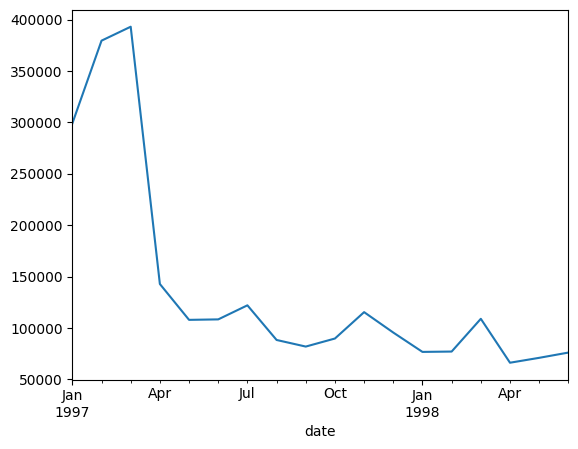

In [19]:
cd_data.reset_index().set_index('date')['price'].resample(rule="MS").sum().plot()
plt.show()

#### Visualize Individual customer purchases

In [20]:
customer_ids = cd_data['customer_id'].unique()
customer_ids

array([    1,     2,     3, ..., 23568, 23569, 23570], dtype=int64)

In [21]:
cust_ids_selected = customer_ids[0:10]
cust_ids_selected

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [22]:
data_cust_id_subset_df =cd_data[cd_data["customer_id"].isin(cust_ids_selected)].groupby(['customer_id','date']).sum().reset_index()
data_cust_id_subset_df

,customer_id,date,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,6,89.00
2,3,1997-01-02,2,20.76
3,3,1997-03-30,2,20.76
4,3,1997-04-02,2,19.54
5,3,1997-11-15,5,57.45
6,3,1997-11-25,4,20.96
7,3,1998-05-28,1,16.99
8,4,1997-01-01,2,29.33
9,4,1997-01-18,2,29.73


In [ ]:
# pip install plotnine

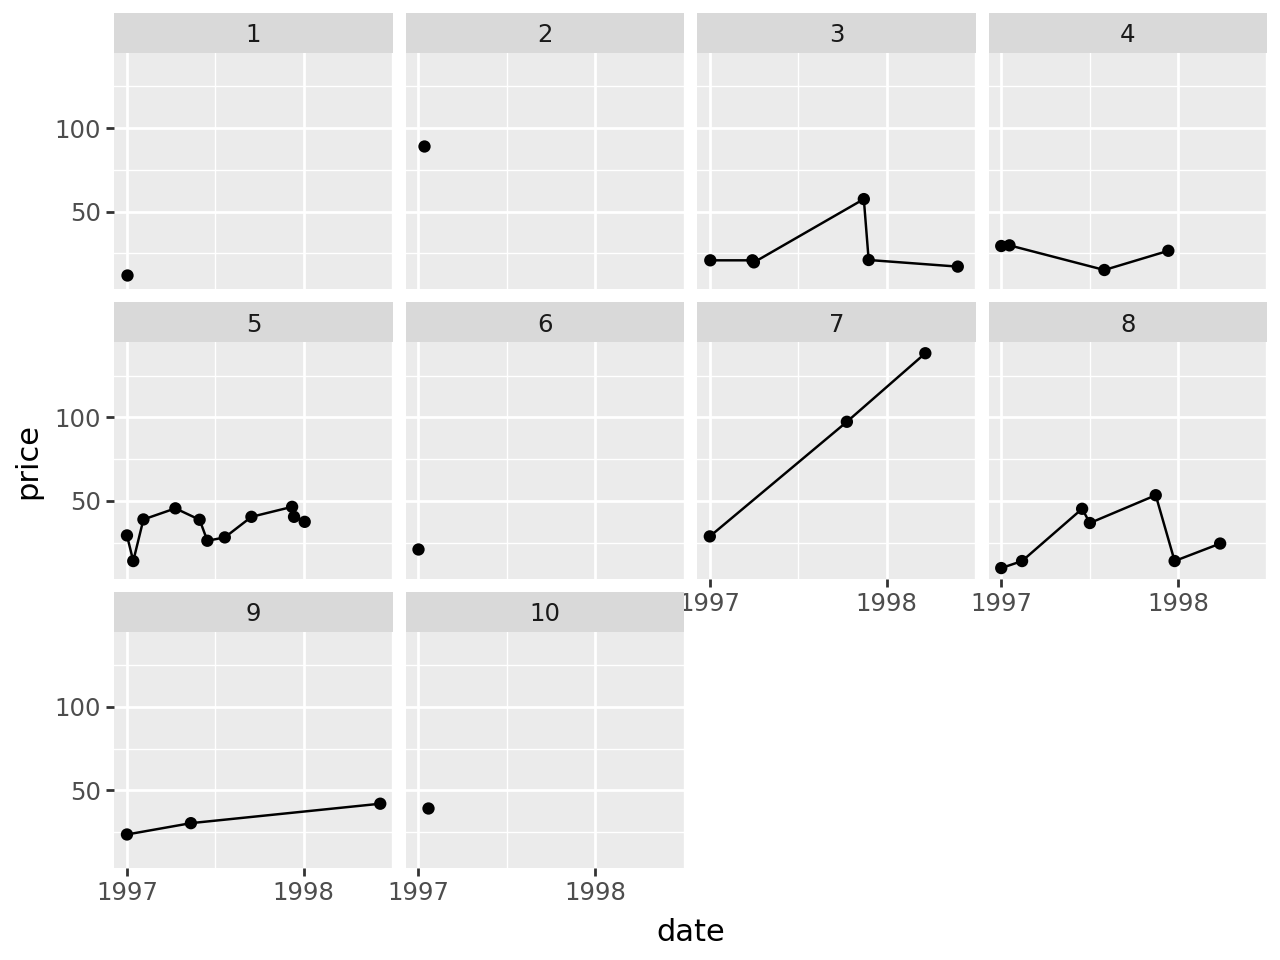

In [24]:
from plotnine import ggplot, aes, geom_line, geom_point, facet_wrap, scale_x_date
from pandas.api.types import CategoricalDtype

# Assuming 'date' and 'price' columns are already in datetime and numeric format, respectively
# Convert 'customer_id' to a categorical type for facet_wrap
cd_data['customer_id'] = cd_data['customer_id'].astype(CategoricalDtype())

(ggplot(data_cust_id_subset_df, aes(x='date', y='price', group='customer_id')) +
 geom_line() +
 geom_point() +
 facet_wrap('~customer_id') +
 scale_x_date(date_breaks='1 year', date_labels='%Y'))


### 3: Machine Learning


- Frame the problem
- What will customer spend in the next 90days
- what is the probability of a customer to make a purchase in the next 90 days ? (Binary)

####  Time Splitting

1. Reference Date: Choose a specific date as the reference point for predicting future spending. This reference date marks the starting point for the 90-day prediction period.

2. Historical Data: Use historical data up to the reference date to create features that capture customers' past behavior and attributes. This could include information such as past purchases, total spend, frequency of purchases, recency of purchases, demographics, etc.

3. Target Variable: Calculate the total spend of each customer during the 90-day period following the reference date. This future spending will be your target variable (y).

In [27]:
n_days = 90 # Reference date
max_date = cd_data['date'].max()
max_date

Timestamp('1998-06-30 00:00:00')

In [28]:
cutoff = max_date - pd.to_timedelta(n_days,unit = 'd')
cutoff

Timestamp('1998-04-01 00:00:00')

In [29]:
temporal_in_data = cd_data[cd_data['date'] <= cutoff ]
temporal_in_data

,customer_id,date,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
...,...,...,...,...
69654,23568,1997-04-05,4,83.74
69655,23568,1997-04-22,1,14.99
69656,23569,1997-03-25,2,25.74
69657,23570,1997-03-25,3,51.12


In [30]:
temporal_out_data = cd_data[cd_data['date'] > cutoff ]
temporal_out_data

,customer_id,date,quantity,price
8,3,1998-05-28,1,16.99
38,9,1998-06-08,2,41.98
68,25,1998-04-17,1,12.99
69,25,1998-05-25,1,10.49
70,25,1998-06-03,3,24.97
...,...,...,...,...
69583,23534,1998-05-02,1,10.48
69623,23555,1998-05-01,4,49.96
69624,23555,1998-06-10,2,27.48
69631,23556,1998-06-07,2,28.98




"In date-based data analysis, we often use a reference date to partition our dataset into two parts: temporal in data and temporal out data. The temporal in data consists of observations recorded before the reference date, which we use to create individual features. On the other hand, the temporal out data includes observations after the reference date, and we use it to generate target features for prediction.

Once we have constructed the temporal in and temporal out data, we combine them into a single dataset. This complete dataset contains both the individual features derived from the temporal in data and the target features derived from the temporal out data. 

To train and evaluate our predictive model, we split this complete dataset into training and testing sets. The training set is used to train the model, allowing it to learn patterns from the data, while the testing set is used to evaluate the model's performance by comparing its predictions against the actual target values.

This approach ensures that our model is trained and evaluated on relevant data, enabling us to make accurate predictions on new, unseen data."

In [31]:
temporal_out_data1 = temporal_out_data.copy()

### Feature Engineering


#### Make targets from temporal out data

In [32]:
temporal_out_data.shape

(5860, 4)

In [33]:
targets_df= temporal_out_data.drop(['quantity','date'],axis=1).groupby('customer_id').sum().rename({'price':'spend_90_total'},axis=1).assign(spend_90_flag=1)
targets_df

,spend_90_total,spend_90_flag
customer_id,,
1,0.00,1
2,0.00,1
3,16.99,1
4,0.00,1
5,0.00,1
...,...,...
23566,0.00,1
23567,0.00,1
23568,0.00,1


- Basically the in the above cell we have to get 3301 rows × 2 columns but i dont know reason i did step wise below

- Basically temporal_out_data.shape is 5860*4 and when we apply group we have to get less than that but we are getting 23570 rows so its wrong 

In [34]:
targets_df= temporal_out_data1.drop(['quantity','date'],axis=1).groupby('customer_id').sum().rename({'price':'spend_90_total'},axis=1)
targets_df

,spend_90_total
customer_id,
1,0.00
2,0.00
3,16.99
4,0.00
5,0.00
...,...
23566,0.00
23567,0.00
23568,0.00


In [35]:
targets_df['spend_90_flag'] = (targets_df['spend_90_total'] > 0).astype(int) 

In [36]:
targets_df

,spend_90_total,spend_90_flag
customer_id,,
1,0.00,0
2,0.00,0
3,16.99,1
4,0.00,0
5,0.00,0
...,...,...
23566,0.00,0
23567,0.00,0
23568,0.00,0


In [37]:
targets_df = targets_df[targets_df['spend_90_total'] != 0]

In [38]:
targets_df

,spend_90_total,spend_90_flag
customer_id,,
3,16.99,1
9,41.98,1
25,73.43,1
29,48.45,1
31,117.99,1
...,...,...
23529,40.56,1
23534,10.48,1
23555,77.44,1


#### Creating Recency (date) feature from using temporal in data 

In [39]:
max_date_in_temporal_in_data = temporal_in_data['date'].max()
max_date_in_temporal_in_data

Timestamp('1998-04-01 00:00:00')

In [40]:
recency_features_df = temporal_in_data[['customer_id','date']].groupby('customer_id').apply(lambda x : (x['date'].max() - max_date_in_temporal_in_data)/pd.to_timedelta(1,"day")).to_frame().set_axis(['recency'],axis=1)

In [41]:
recency_features_df

,recency
customer_id,
1,-455.0
2,-444.0
3,-127.0
4,-110.0
5,-88.0
...,...
23566,-372.0
23567,-372.0
23568,-344.0


#### Create Freequency (Count) feature from using temporl in data

In [42]:
freequency_feature_df =  temporal_in_data[['customer_id','date']].groupby('customer_id').count().set_axis(['freequency'],axis=1)

In [43]:
freequency_feature_df

,freequency
customer_id,
1,1
2,2
3,5
4,4
5,11
...,...
23566,1
23567,1
23568,3


#### Create Price (Monetary) feature from using temporal in data

In [45]:
monetary_features_df = temporal_in_data.groupby('customer_id').aggregate({
    'price':['sum','mean']
}
).set_axis(['price_sum','price_mean'],axis=1)
monetary_features_df

,price_sum,price_mean
customer_id,,
1,11.77,11.770000
2,89.00,44.500000
3,139.47,27.894000
4,100.50,25.125000
5,385.61,35.055455
...,...,...
23566,36.00,36.000000
23567,20.97,20.970000
23568,121.70,40.566667


####  Combining  recency,frequency,monetary and targets features to a single features dataframe

In [46]:
features_df = pd.concat([recency_features_df,freequency_feature_df,monetary_features_df],axis=1)
features_df.merge(targets_df,left_index=True, right_index=True,how='left')

,recency,freequency,price_sum,price_mean,spend_90_total,spend_90_flag
customer_id,,,,,,
1,-455.0,1,11.77,11.770000,NaN,NaN
2,-444.0,2,89.00,44.500000,NaN,NaN
3,-127.0,5,139.47,27.894000,16.99,1.0
4,-110.0,4,100.50,25.125000,NaN,NaN
5,-88.0,11,385.61,35.055455,NaN,NaN
...,...,...,...,...,...,...
23566,-372.0,1,36.00,36.000000,NaN,NaN
23567,-372.0,1,20.97,20.970000,NaN,NaN
23568,-344.0,3,121.70,40.566667,NaN,NaN


In [47]:
df = pd.concat([recency_features_df,freequency_feature_df,monetary_features_df],axis=1)
df = features_df.merge(targets_df,left_index=True, right_index=True,how='left').fillna(0)

In [48]:
df.head(5)

,recency,freequency,price_sum,price_mean,spend_90_total,spend_90_flag
customer_id,,,,,,
1,-455.0,1,11.77,11.770000,0.00,0.0
2,-444.0,2,89.00,44.500000,0.00,0.0
3,-127.0,5,139.47,27.894000,16.99,1.0
4,-110.0,4,100.50,25.125000,0.00,0.0
5,-88.0,11,385.61,35.055455,0.00,0.0


### Creating Predictive  Machine Learning Models 

#### Creating a model for predicting the customer spend in next 90-days

In [56]:
from xgboost import XGBRegressor,XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,f1_score,recall_score
from sklearn.metrics import classification_report 

In [51]:
X = df[['recency','freequency','price_mean','price_sum']]
y = df['spend_90_total']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [55]:
xgb = XGBRegressor(random_state = 42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='r2', cv=5, verbose=1, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)
best_xgb_reg = grid_search.best_estimator_
print(best_xgb_reg)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best Score:  0.3409629233319878
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [60]:
y_predicted = best_xgb_reg.predict(X_test)
mae = mean_absolute_error(y_test,y_predicted)
print("Mean Absolute Error: ",mae)
mse = mean_squared_error(y_test,y_predicted)
print("Mean Squared Error: ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)
r2 = r2_score(y_test,y_predicted)
print("R-squarred Error: ",r2)

Mean Absolute Error:  11.13038185166834
Mean Squared Error:  1304.1941108322976
Root Mean Squared Error:  36.11362777169164
R-squarred Error:  0.44445139059110805


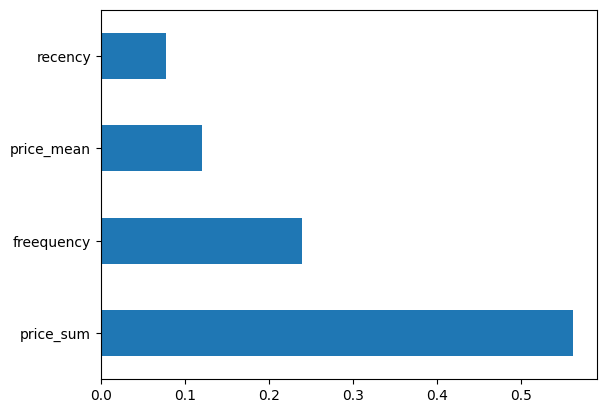

In [62]:
feat_importances = pd.Series(best_xgb_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [63]:
imp_spend_amount_dict = grid_search.best_estimator_.get_booster().get_score(importance_type = 'gain')
imp_spend_amount_dict

{'recency': 154144.296875,
 'freequency': 479263.1875,
 'price_mean': 241911.5625,
 'price_sum': 1123568.375}

In [64]:
imp_spend_amount_df = pd.DataFrame(
data = {
    'feature':list(imp_spend_amount_dict.keys()),
    'values':list(imp_spend_amount_dict.values())
})

In [65]:
imp_spend_amount_df

,feature,values
0,recency,1.541443e+05
1,freequency,4.792632e+05
2,price_mean,2.419116e+05
3,price_sum,1.123568e+06


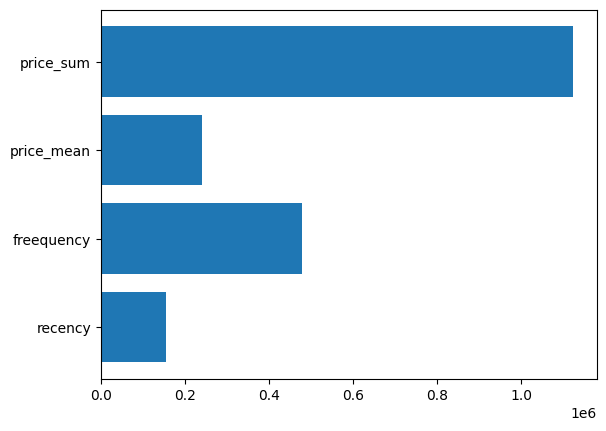

In [100]:
plt.barh(y=imp_spend_amount_df['feature'],width=imp_spend_amount_df['values'])
plt.show()

#### Creating a model for Predicting next 90 days spend probability of customers

In [71]:
X = df[['recency','freequency','price_mean','price_sum']]
y = df['spend_90_flag']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [75]:
model = XGBClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
}

grid_search = GridSearchCV(estimator = model,param_grid = param_grid,cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train,y_train)
print("Best Parameters:", grid_search.best_params_)
best_xgb_cls= grid_search.best_estimator_
print(best_xgb_cls)
print(grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
0.41134145811565875


In [83]:
y_prob = best_xgb_cls.predict(X_test)
accuracy = accuracy_score(y_test,y_prob)
print("The accuracy of model is: ",accuracy)
f1_score = f1_score(y_test,y_prob)
print("The f1 score of model is: ",f1_score)

The accuracy of model is:  0.8872860981473625
The f1 score of model is:  0.45745405037440434


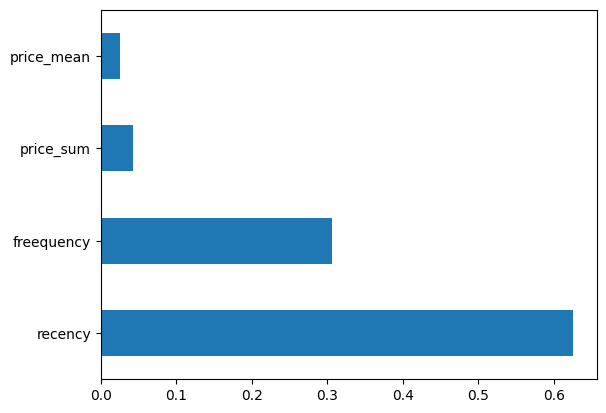

In [94]:
feat_importances = pd.Series(best_xgb_cls.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [95]:
imp_spend_prob_dict = grid_search.best_estimator_.get_booster().get_score(importance_type = 'gain')

In [96]:
imp_spend_prob_dict

{'recency': 63.98823547363281,
 'freequency': 31.35024070739746,
 'price_mean': 2.5577800273895264,
 'price_sum': 4.4342122077941895}

In [97]:
imp_spend_prob_dict = pd.DataFrame(
data = {
    'feature':list(imp_spend_prob_dict.keys()),
    'values':list(imp_spend_prob_dict.values())
})

In [98]:
imp_spend_prob_dict

,feature,values
0,recency,63.988235
1,freequency,31.350241
2,price_mean,2.557780
3,price_sum,4.434212


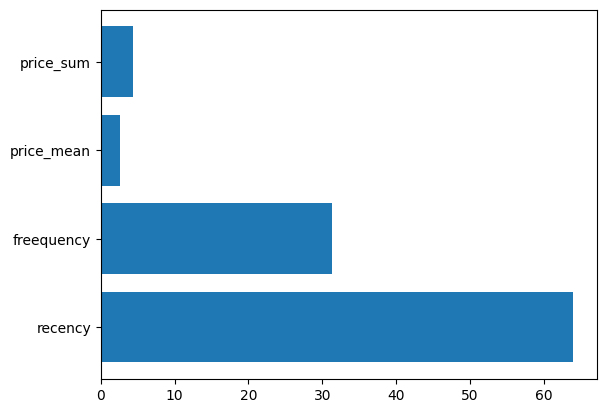

In [102]:
plt.barh(y=imp_spend_prob_dict['feature'],width=imp_spend_prob_dict['values'])
plt.show()

**I have developed a robust predictive model aimed at forecasting future customer spending behavior. Leveraging historical data up to a reference date and using advanced machine learning techniques, the model accurately predicts the likelihood of customers making purchases in the next 90 days. By analyzing various customer attributes and past purchasing patterns, the model generates insightful predictions that can inform targeted marketing strategies and optimize resource allocation.**

# To Answer Specific Business Questions

**To address specific business questions and glean actionable insights, I have applied the trained model to the entire dataset, encompassing both historical data (up to the reference date) and future periods. This holistic approach allows for a comprehensive examination of customer spending probabilities and facilitates the identification of key opportunities and trends.**

In [104]:
df.head(5)

,recency,freequency,price_sum,price_mean,spend_90_total,spend_90_flag
customer_id,,,,,,
1,-455.0,1,11.77,11.770000,0.00,0.0
2,-444.0,2,89.00,44.500000,0.00,0.0
3,-127.0,5,139.47,27.894000,16.99,1.0
4,-110.0,4,100.50,25.125000,0.00,0.0
5,-88.0,11,385.61,35.055455,0.00,0.0


In [108]:
X = df[['recency','freequency','price_mean','price_sum']]
y_spend = df['spend_90_total']

**Next 90 days spend**

In [109]:
xgb = XGBRegressor(random_state = 42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, refit=True,verbose=1, n_jobs=-1)
grid_result = grid_search.fit(X, y_spend)
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)
best_xgb_reg = grid_search.best_estimator_
print(best_xgb_reg)
prediction_reg = best_xgb_reg.predict(X)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score:  -10.829436792847739
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [110]:
X = df[['recency','freequency','price_mean','price_sum']]
y_prob = df['spend_90_flag']

In [111]:
model = XGBClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
}

grid_search = GridSearchCV(estimator = model,param_grid = param_grid,cv=5, scoring='roc_auc', refit=True,verbose=2, n_jobs=-1)
grid_search.fit(X,y_prob)
print("Best Parameters:", grid_search.best_params_)
best_xgb_cls= grid_search.best_estimator_
print(best_xgb_cls)
print(grid_search.best_score_)
predictions_clf = best_xgb_cls.predict_proba(X)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
0.839394721728506


In [112]:
predictions_clf

array([[0.9512306 , 0.04876941],
       [0.93732023, 0.06267975],
       [0.73248786, 0.26751214],
       ...,
       [0.8783005 , 0.1216995 ],
       [0.9445371 , 0.05546291],
       [0.919693  , 0.08030698]], dtype=float32)

### Saving results into a data darame

In [114]:
df.head(4)

,recency,freequency,price_sum,price_mean,spend_90_total,spend_90_flag
customer_id,,,,,,
1,-455.0,1,11.77,11.770,0.00,0.0
2,-444.0,2,89.00,44.500,0.00,0.0
3,-127.0,5,139.47,27.894,16.99,1.0
4,-110.0,4,100.50,25.125,0.00,0.0


**Through this analysis, I can pinpoint customers with the highest spend probabilities in the upcoming 90 days, identify those who have recently made purchases but are unlikely to buy again, and highlight instances where predicted purchases did not materialize. By leveraging the predictive power of the model across the entire dataset, I aim to provide valuable insights that drive strategic decision-making and enhance customer engagement initiatives.a**

In [125]:
results_df = pd.concat(
    [
        pd.DataFrame(prediction_reg, columns=['predicted_spend']),
        pd.DataFrame(predictions_clf[:, 1], columns=['predicted_probability']),
        df.reset_index()  # Resetting index to avoid duplicate index columns
    ],
    axis=1
)

In [126]:
results_df

,predicted_spend,predicted_probability,customer_id,recency,freequency,price_sum,price_mean,spend_90_total,spend_90_flag
0,1.026725,0.048769,1,-455.0,1,11.77,11.770000,0.00,0.0
1,3.409499,0.062680,2,-444.0,2,89.00,44.500000,0.00,0.0
2,9.949076,0.267512,3,-127.0,5,139.47,27.894000,16.99,1.0
3,9.052853,0.264514,4,-110.0,4,100.50,25.125000,0.00,0.0
4,37.313549,0.526537,5,-88.0,11,385.61,35.055455,0.00,0.0
...,...,...,...,...,...,...,...,...,...
23565,1.661901,0.055463,23566,-372.0,1,36.00,36.000000,0.00,0.0
23566,1.026725,0.055463,23567,-372.0,1,20.97,20.970000,0.00,0.0
23567,4.916615,0.121699,23568,-344.0,3,121.70,40.566667,0.00,0.0
23568,1.164303,0.055463,23569,-372.0,1,25.74,25.740000,0.00,0.0


## Using the obtained Inforamation to answer Business Question 

### 1. customers with the highest spend probabilities in the upcoming 90 days

In [127]:
results_df.sort_values(['predicted_spend'],ascending=False)

,predicted_spend,predicted_probability,customer_id,recency,freequency,price_sum,price_mean,spend_90_total,spend_90_flag
7591,2464.071289,0.707222,7592,-2.0,165,11478.02,69.563758,2512.91,1.0
14047,1718.416748,0.707222,14048,0.0,180,7267.15,40.373056,1709.18,1.0
7982,1148.356323,0.707222,7983,-9.0,105,5824.14,55.468000,1148.93,1.0
7930,865.367432,0.707222,7931,-10.0,54,5486.74,101.606296,1010.44,1.0
498,837.610962,0.707222,499,-3.0,100,3427.55,34.275500,951.00,1.0
...,...,...,...,...,...,...,...,...,...
6975,0.175261,0.043421,6976,-429.0,1,117.93,117.930000,0.00,0.0
15212,0.175261,0.054269,15213,-401.0,1,112.43,112.430000,0.00,0.0
8634,0.175261,0.043421,8635,-423.0,1,121.32,121.320000,0.00,0.0
14542,0.175261,0.054269,14543,-404.0,1,114.20,114.200000,0.00,0.0


- **It will help the buisness to target for new products similar to what they have purchased in the past**

### 2.  Identify those who have recently made purchases but are unlikely to buy again,

In [132]:
results_df[(results_df['recency'] > -90 )&(results_df['predicted_probability'] < 0.20)].sort_values('predicted_probability',ascending=False)

,predicted_spend,predicted_probability,customer_id,recency,freequency,price_sum,price_mean,spend_90_total,spend_90_flag
18383,13.352223,0.19150,18384,-64.0,2,89.55,44.775,0.00,0.0
2598,11.299321,0.19150,2599,-64.0,2,83.45,41.725,0.00,0.0
9704,13.352223,0.19150,9705,-58.0,2,98.75,49.375,0.00,0.0
8507,14.248446,0.19150,8508,-59.0,2,126.90,63.450,39.47,1.0
7118,13.911239,0.19150,7119,-58.0,2,111.37,55.685,0.00,0.0
...,...,...,...,...,...,...,...,...,...
9901,7.288252,0.16898,9902,-81.0,2,44.69,22.345,12.99,1.0
9663,7.288252,0.16898,9664,-70.0,2,28.48,14.240,0.00,0.0
8237,7.288252,0.16898,8238,-81.0,2,23.48,11.740,0.00,0.0
7507,7.288252,0.16898,7508,-85.0,2,41.47,20.735,0.00,0.0


**Provide discounts,encourage reffering a friend,nurture by letting them know whats coming.**

**Incentivize actions to increase probability.**

### 3. Missed Oppurtunities 

**Highlight instances where predicted purchases did not materialize.**

In [134]:
results_df[results_df['spend_90_total'] ==0 ].sort_values('predicted_spend',ascending=False)

,predicted_spend,predicted_probability,customer_id,recency,freequency,price_sum,price_mean,spend_90_total,spend_90_flag
21684,219.367142,0.679267,21685,-14.0,25,2031.06,81.242400,0.0,0.0
17522,216.220413,0.707222,17523,-5.0,17,2280.08,134.122353,0.0,0.0
1160,205.778137,0.702174,1161,-10.0,11,1244.34,113.121818,0.0,0.0
17476,184.396774,0.659635,17477,-27.0,17,1248.14,73.420000,0.0,0.0
4880,167.036072,0.369802,4881,-31.0,5,1319.83,263.966000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10960,0.175261,0.054269,10961,-375.0,1,112.20,112.200000,0.0,0.0
10962,0.175261,0.042983,10963,-416.0,1,118.58,118.580000,0.0,0.0
11088,0.175261,0.042983,11089,-416.0,1,112.17,112.170000,0.0,0.0
17757,0.175261,0.054269,17758,-393.0,1,114.52,114.520000,0.0,0.0


#### Send Bundle offers encouraging volume purchases


**Focus on missed oppurtunities**

## Conclusion

In this project, I employed XGBoostRegressor to forecast the next 90 days' spend and XGBoostClassifier to predict the probability of purchases within the next 90 days. To calculate the Customer Lifetime Value (CLTV), I merged temporal in and out data, which encompass historical features and target variables, respectively. By training and evaluating the model on this combined dataset, I aimed to address specific business inquiries.

By leveraging the models trained on the combined dataset, I provided insights into customer spending patterns and purchase probabilities without splitting the data. This approach facilitated the assessment of high spend probabilities, identification of recent purchasers unlikely to buy again, and detection of missed opportunities where predicted purchases did not materialize.

Furthermore, I split the combined data into training and evaluation sets to ensure model robustness and performance assessment. Through this process, I identified significant features contributing to model predictions, which can be crucial for model deployment and future prediction tasks.

In summary, the project utilized advanced modeling techniques and a unified dataset to derive actionable insights, enabling strategic decision-making and enhancing customer relationship management strategies. The incorporation of model evaluation and feature importance analysis ensures the applicability and reliability of the developed models in real-world scenarios.